<a href="https://colab.research.google.com/github/simsekergun/Attention/blob/main/Qc_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Required packages/modules
- `pip install torch`
- `pip install torchvision`
- `pip install GPUtil`

In [ ]:
!pip install gputil
!pip install psutil
!pip install humanize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=4c5fa3c12e535c2c66a832811b0e91e8932dddd513c1bd05157268a6a80267a9
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built gputil
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/simsekergun/Attention.git
#%run /content/Attention/Attention.py
%run ./Attention/Attention.py

Cloning into 'Attention'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 28 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.


/content/Attention/Attention.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
%mkdir ./csv_files_for_paper/
%mkdir ./png_files_for_paper/

In [ ]:
ls ./Attention

Attention.py                     Qc_Dataset1.pt  README.md
attnT_add_adamW_relu_relu.ipynb  Qc_Dataset2.pt


In [ ]:
Qc_vec1 = torch.load('./Attention/Qc_Dataset1.pt')
Qc_vec2 = torch.load('./Attention/Qc_Dataset2.pt')
Qc_Dataset = torch.cat((Qc_vec1, Qc_vec2), 0)
Qc_Dataset.shape

torch.Size([5748, 579])

In [ ]:
# Splitting into train and test datasets:
rnn_train_data, rnn_test_data = torch.utils.data.random_split(RNN_Dataset(Qc_Dataset), (Qc_Dataset.shape[0]-1000, 1000)) 
# Loading the data through DataLoader:

train_loader = DataLoader(rnn_train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(rnn_test_data, batch_size=32, shuffle=False)

In [ ]:
# Defining an lstm model
lstm_model = recurrent_model(T_length=19, input_dim=25, num_layers=3, num_neurons=512, output_dim=160, model_type='LSTM', bidirectional=False)

eta = 0.001
loss_func = nn.MSELoss()
optimizer = torch.optim.AdamW(lstm_model.parameters(), lr=eta)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10, gamma=0.5)

In [ ]:
# Execute function
mem_report()

CPU RAM Free: 12.4 GB
GPU 0 ... Mem Free: 15106MB / 15109MB | Utilization   0%


In [ ]:
# Training the lstm model
start = time.time()
lstm_results = train_network_reg(lstm_model, loss_func, train_loader, test_loader=test_loader, epochs=100, score_funcs={'R^2 score': r2_score}, 
                                device=device, optimizer=optimizer, lr_schedule=scheduler)
stop = time.time()
print('Processing time: %s sec' %(stop-start))

Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Processing time: 3622.7966301441193 sec


In [ ]:
# Presenting the performance of the lstm model

lstm_results

,epoch,total time,train loss,test loss,train R^2 score,test R^2 score
0,0,30.750497,3.985259,1.423710,-1.855942,-0.006547
1,1,60.948310,1.570894,1.254192,-0.123487,0.111553
2,2,90.895580,0.884752,0.753236,0.366063,0.462408
3,3,120.486706,0.746113,0.752737,0.464732,0.461933
4,4,150.518116,0.730860,0.692196,0.475984,0.505350
...,...,...,...,...,...,...
95,95,2872.963382,0.053853,0.050346,0.961616,0.964212
96,96,2903.084250,0.054471,0.049829,0.961182,0.964564
97,97,2933.199394,0.052537,0.049904,0.962707,0.964512
98,98,2963.442269,0.054733,0.049224,0.960977,0.965009


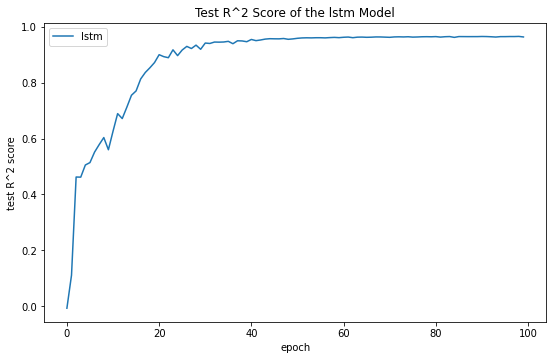

In [ ]:
# Plotting the accuracy of the fully connected model:
sns.lineplot(x='epoch', y='test R^2 score', data=lstm_results, label='lstm')
plt.title('Test R^2 Score of the lstm Model')
plt.gcf().set_size_inches(9, 5.5)
plt.show()

In [ ]:
lstm_results.to_csv('./csv_files_for_paper/lstm_results.csv',index=False)

In [ ]:
mem_report()

CPU RAM Free: 10.5 GB
GPU 0 ... Mem Free: 13649MB / 15109MB | Utilization  10%


In [ ]:
# used GPU memory: 1.457 GB
# used RAM: 2.91 GB
# training: 61 minutes (3622.8 seconds)
# training loss = 0.055771   R^2 = 0.961719	
# test loss = 0.052013	     R^2 = 0.963052

15106-13649

1457